# Prosper Loan Data Exploration
## by Chukwume Ijeh

## Preliminary Wrangling

> This document explores a dataset originally containing 113,937 loan entries with 81 variables on each entry, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
df_loan.shape

(113937, 81)

In [4]:
# high-level overview of data composition
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# Subset the dataframe by selecting features of interest
cols = ['ListingCreationDate','ProsperScore', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'CurrentDelinquencies']
df_sub = df_loan[cols]

In [6]:
# Remove loans with missing borrower APR information
df_sub = df_sub[~df_sub.BorrowerAPR.isna()]

In [7]:
df_sub.head()

,ListingCreationDate,ProsperScore,IsBorrowerHomeowner,CreditScoreRangeLower,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,DebtToIncomeRatio,Term,ProsperRating (Alpha),EmploymentStatus,CurrentDelinquencies
0,2007-08-26 19:09:29.263000000,NaN,True,640.0,9425,0.16516,3083.333333,0.17,36,NaN,Self-employed,2.0
1,2014-02-27 08:28:07.900000000,7.0,False,680.0,10000,0.12016,6125.000000,0.18,36,A,Employed,0.0
2,2007-01-05 15:00:47.090000000,NaN,False,480.0,3001,0.28269,2083.333333,0.06,36,NaN,Not available,1.0
3,2012-10-22 11:02:35.010000000,9.0,True,800.0,10000,0.12528,2875.000000,0.15,36,A,Employed,4.0
4,2013-09-14 18:38:39.097000000,4.0,True,680.0,15000,0.24614,9583.333333,0.26,36,D,Employed,0.0


In [8]:
# descriptive statistics for numeric variables
df_sub.describe()

,ProsperScore,CreditScoreRangeLower,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,DebtToIncomeRatio,Term,CurrentDelinquencies
count,84853.000000,113346.000000,113912.000000,113912.000000,1.139120e+05,105358.000000,113912.000000,113240.000000
mean,5.950067,685.567731,8338.015661,0.218828,5.606973e+03,0.275993,40.831308,0.592052
std,2.376501,66.458275,6245.940592,0.080364,7.478338e+03,0.551814,10.437112,1.978707
min,1.000000,0.000000,1000.000000,0.006530,0.000000e+00,0.000000,12.000000,0.000000
25%,4.000000,660.000000,4000.000000,0.156290,3.200000e+03,0.140000,36.000000,0.000000
50%,6.000000,680.000000,6500.000000,0.209760,4.666667e+03,0.220000,36.000000,0.000000
75%,8.000000,720.000000,12000.000000,0.283810,6.817083e+03,0.320000,36.000000,0.000000
max,11.000000,880.000000,35000.000000,0.512290,1.750003e+06,10.010000,60.000000,83.000000


In [9]:
df_sub.shape

(113912, 12)

### What is the structure of your dataset?

> The new dataset contains 113,912 loan entries with 12 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others).

### What is/are the main feature(s) of interest in your dataset?

> This project is most interested in figuring out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the following features: Borrowers stated monthly income, loan term, total loan amount, prosper rating, prosper score, employment status and others will help support investigation into borrower's APR.

## Univariate Exploration

> Let's start by converting all column names to lower case and then look at the distribution of the main variable of interest: borrower APR.

In [10]:
df_sub.columns = map(str.lower, df_sub.columns)

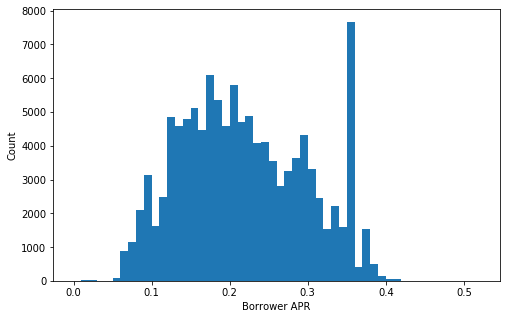

In [17]:
bins = np.arange(0, df_sub.borrowerapr.max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_sub, x = 'borrowerapr', bins = bins);
plt.xlabel('Borrower APR')
plt.ylabel('Count');

The distribution of APR looks multimodal. There appears to be several peaks just before 0.1, around 0.18 and 0.2, right before 0.3. There is also a very distinct peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

In [19]:
# Check loans with APR greater than 0.43
df_sub[df_sub.borrowerapr>0.43]

,prosperscore,isborrowerhomeowner,creditscorerangelower,loanoriginalamount,borrowerapr,statedmonthlyincome,debttoincomeratio,term,prosperrating (alpha),employmentstatus,currentdelinquencies
18326,NaN,False,NaN,3000,0.45857,10000.000000,0.10252,36,NaN,NaN,NaN
22195,NaN,False,NaN,1789,0.46201,2916.666667,0.35430,36,NaN,NaN,NaN
36018,NaN,False,NaN,1500,0.51229,2838.000000,0.02852,36,NaN,NaN,NaN
56761,NaN,False,NaN,3000,0.50633,0.000000,0.03909,36,NaN,NaN,NaN
82043,NaN,False,NaN,3000,0.48873,1583.333333,0.10021,36,NaN,NaN,NaN
103973,NaN,False,NaN,2800,0.45857,3750.000000,0.19413,36,NaN,NaN,NaN


From the table above, all borrowers with APR above 0.43 seem to have a lot in common. Could they be 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!